In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [7]:
TRAINER_STATE_FILEPATH = "../data/mb/train/trainer_state.json"

In [5]:
def load_trainer(filepath):

    with open(TRAINER_STATE_FILEPATH) as f:
        data = json.load(f)
    
    log_history = data['log_history']
        
    # Initialize lists to store the data
    epochs, steps, grad_norms, learning_rates, train_losses, eval_losses = [], [], [], [], [], []
    
    for entry in log_history:
        epochs.append(entry.get('epoch'))
        steps.append(entry.get('step'))
        grad_norms.append(entry.get('grad_norm'))
        learning_rates.append(entry.get('learning_rate'))
        train_losses.append(entry.get('loss'))
        eval_losses.append(entry.get('eval_loss'))
    
    # Create a DataFrame
    df = pd.DataFrame({
        'epoch': epochs,
        'step': steps,
        'grad_norm': grad_norms,
        'learning_rate': learning_rates,
        'train_loss': train_losses,
        'eval_loss': eval_losses
    })
    
    df_train = df[~df.train_loss.isna()]
    df_eval = df[~df.eval_loss.isna()]

    return df_train, df_eval

In [8]:
df_train, df_eval = load_trainer(TRAINER_STATE_FILEPATH)

In [ ]:
# t2['epoch'] = t2.epoch + 2
# e2['epoch'] = e2.epoch + 2

In [9]:
df_train = pd.concat([df_train, t2])
df_eval = pd.concat([df_eval, e2])

NameError: name 't2' is not defined

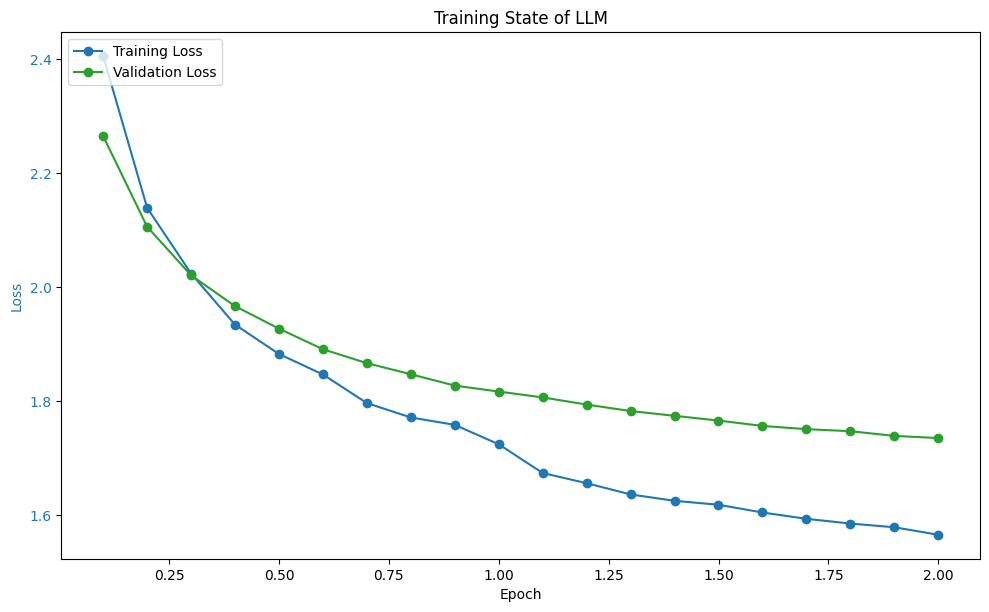

In [11]:
# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(df_train['epoch'], df_train['train_loss'], label='Training Loss', color=color, linestyle="-", marker="o",)
ax1.plot(df_eval['epoch'], df_eval['eval_loss'], label='Validation Loss', color='tab:green', marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()
# color = 'tab:red'
# ax2.set_ylabel('Grad Norm / Learning Rate', color=color)
# ax2.plot(df['epoch'], df['grad_norm'], label='Gradient Norm', color='tab:red', linestyle='dashed', marker='x')
# ax2.plot(df['epoch'], df['learning_rate'], label='Learning Rate', color='tab:orange', linestyle='dashed', marker='x')
# ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')
plt.title('Training State of LLM')
plt.show()